# Setores Censitários

## Fontes

ftp://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros/RJ/

https://cidades.ibge.gov.br/brasil/panorama

In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

In [2]:
import os
import zipfile
import shutil

In [7]:
#cria pasta temporária para extrair arquivos zipados de setores censitários
dir_temp = '../Dados/Mapas/RJ-SETOR/TEMP'
if not os.path.exists(dir_temp):
    os.makedirs(dir_temp)

In [20]:
#exemplos de listagem de dados do os.WALK
for root, dirs, files in os.walk('../Dados/Transporte'):
    display(root)
for root, dirs, files in os.walk('../Dados/Transporte'):
    display(dirs)
for root, dirs, files in os.walk('../Dados/Transporte'):
    display(files)

'../Dados/Transporte'

'../Dados/Transporte\\BRT'

'../Dados/Transporte\\Metrô'

'../Dados/Transporte\\Trem'

['BRT', 'Metrô', 'Trem']

[]

[]

[]

[]

['Estações_BRT.geojson']

['Estações_Metrô.geojson']

['Estações_Trem.geojson']

In [5]:
#gera list com todos arquivos na pasta
filenames = []
for root, dirs, files in os.walk('../Dados/Mapas/RJ-SETOR/DADOS'):
    filenames = files
#lista de arquivos    
filenames

['33045570506.zip',
 '33045570507.zip',
 '33045570508.zip',
 '33045570509.zip',
 '33045570510.zip',
 '33045570511.zip',
 '33045570512.zip',
 '33045570513.zip',
 '33045570514.zip',
 '33045570515.zip',
 '33045570516.zip',
 '33045570517.zip',
 '33045570519.zip',
 '33045570520.zip',
 '33045570521.zip',
 '33045570522.zip',
 '33045570523.zip',
 '33045570524.zip',
 '33045570525.zip',
 '33045570526.zip',
 '33045570527.zip',
 '33045570528.zip',
 '33045570529.zip',
 '33045570530.zip',
 '33045570531.zip',
 '33045570532.zip',
 '33045570533.zip',
 '33045570534.zip',
 '33045570535.zip',
 '33045570536.zip',
 '33045570537.zip',
 '33045570538.zip',
 '33045570539.zip']

In [8]:
#extrai cada um dos arquivos ZIP listados na célula anterior para a pasta temporária
for item in filenames:
    zip_ref = zipfile.ZipFile('../Dados/Mapas/RJ-SETOR/DADOS/' + item, 'r')
    zip_ref.extractall(dir_temp)
    zip_ref.close()

In [11]:
#exemplo do nome do arquivo zip
display(filenames[0])
#removendo a extenção de todos arquivos
display(filenames[0][:-4])

'33045570506.zip'

'33045570506'

In [24]:
#GERANDO UMA LISTA DE GeoDataFrames, com o read_file de cada arquivo em filenames
#O list compreension realiza a manipulação do nome de cada arquivo para ser carregado
#exibe somente os 2 primeiros datasets da lista
[gpd.read_file(dir_temp + '/' + item[:-4] + '_setor.shp') for item in filenames][0:1]

[       ID1       CD_GEOCODI    TIPO    CD_GEOCODB     NM_BAIRRO CD_GEOCODD  \
 0   400341  330455705060018  URBANO  330455705004          Caju  330455705   
 1   400342  330455705060019  URBANO  330455705004          Caju  330455705   
 2   400343  330455705060020  URBANO  330455705004          Caju  330455705   
 3   400344  330455705060021  URBANO  330455705004          Caju  330455705   
 4   400347  330455705060024  URBANO  330455705003  Santo Cristo  330455705   
 ..     ...              ...     ...           ...           ...        ...   
 70  401470  330455705060071  URBANO  330455705003  Santo Cristo  330455705   
 71  401471  330455705060072  URBANO  330455705004          Caju  330455705   
 72  401472  330455705060073  URBANO  330455705004          Caju  330455705   
 73  401473  330455705060074  URBANO  330455705004          Caju  330455705   
 74  401474  330455705060075  URBANO  330455705004          Caju  330455705   
 
         NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCO

In [27]:
#concatena todos GeoDataFrames carregados arquivo por arquivo conforme comando que lista acima
setor = pd.concat([gpd.read_file(dir_temp + '/' + item[:-4] + '_setor.shp') for item in filenames], ignore_index=True)

In [28]:
#remove a pasta temporária
shutil.rmtree(dir_temp)

In [31]:
display(setor.head())
display(type(setor))
display(setor.crs)

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,400341,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21275 -22.87525, -43.21309 -22.8..."
1,400342,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21314 -22.87493, -43.21326 -22.8..."
2,400343,330455705060020,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21327 -22.87309, -43.21335 -22.8..."
3,400344,330455705060021,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.21150 -22.87423, -43.21169 -22.8..."
4,400347,330455705060024,URBANO,330455705003,Santo Cristo,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.20743 -22.90731, -43.20752 -22.9..."


geopandas.geodataframe.GeoDataFrame

{'init': 'epsg:4674'}

In [34]:
#converte o geodataframe dos setores concatenados para o sistema de coordenadas UTM com unidade de km
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [35]:
setor.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

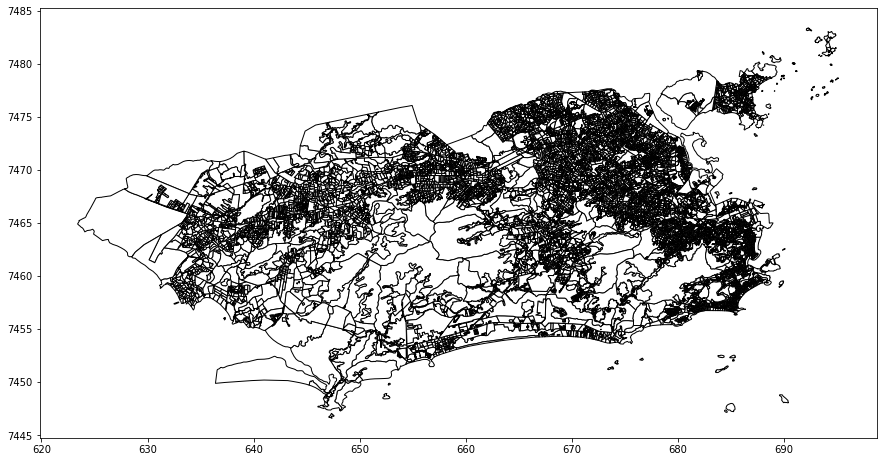

In [36]:
setor.plot(color='white', edgecolor='black', figsize=(15, 8))

In [37]:
#salva setores cencitáios unidos em um shape
setor.to_file('../Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

In [38]:
#procurar setores censitários dentro do bairro Botafogo
botafogo = setor[setor['NM_BAIRRO'] == 'Botafogo']

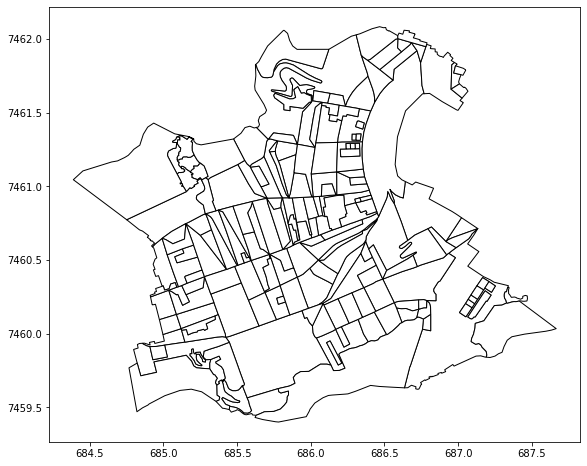

In [40]:
#plota somente os setores do bairro
botafogo.plot(color='white', edgecolor='black', figsize=(15, 8))